In [1]:
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import numpy as np
from PIL import Image
import imutils
from tensorflow.keras.models import load_model

## Face Detection:
* The MTCNN model has been used to detect faces from the image.
* The model returns the coordinates of the face along with the confidence value as well

In [2]:
def face_detection(img):
    detector = MTCNN()
    faces = detector.detect_faces(img)

    return faces

* Crop the faces from the image and make predictions on it regarding whether the face has a mask or not

In [3]:
def mask_prediction(crop, model):
    ans = {0: 'Mask', 1: 'No Mask'}
    img1 = crop
    img1 = cv2.resize(img1, (100, 100))
    img1 = np.array(img1).reshape((1, 100, 100, 3))
    Y_pred = model.predict(img1)
    y_pred = np.argmax(Y_pred, axis=1)
    text = ans[y_pred[0]]

    return text

In [4]:
def final_func(faces, img, final_img, model):
    color = {'Mask': (0, 255, 0), 'No Mask': (255, 0, 0)}
    for i in faces:
        if i['confidence'] > 0.92: ####
            crop = img[i['box'][1]:i['box'][1]+i['box'][3],
                       i['box'][0]:i['box'][0]+i['box'][2], :]
            if crop.shape[0]+crop.shape[1] > 185: ####
                text = mask_prediction(crop, model)
                cv2.putText(final_img, text, (i['box'][0], i['box'][1]-10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.5, color[text], 6)
                cv2.rectangle(final_img, (i['box'][0], i['box'][1]), (i['box']
                              [0]+i['box'][2], i['box'][1]+i['box'][3]), color[text], 6)

    return final_img

In [5]:
def for_image(img, model):
    img = Image.open(img)
    img = np.array(img)
    img = imutils.resize(img, width=3000) ####

    final_img = img
    faces = face_detection(img)
    answer = final_func(faces, img, final_img, model)
    answer = imutils.resize(answer, width=700) ####
    
    plt.figure(figsize=(15,15))
    plt.imshow(answer)

In [6]:
def for_video(vs, model):
    count = 0

    while True:
        (grabbed, img) = vs.read()
        count += 1
        
        if count % 20 != 0:  #consider every 20th frame instead of detecting on each frame
            continue
        if not grabbed:
            break
        
        img = imutils.resize(img, width=3000)      
        final_img = img
        faces = face_detection(img)
        final_img = final_func(faces, img, final_img, model)
        
        final_img = cv2.resize(final_img, (700,400))
        cv2.imshow('output',final_img)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("x"):
            break

    cv2.destroyAllWindows()
    vs.release()

In [7]:
model = load_model('..\models/face_mask.h5')

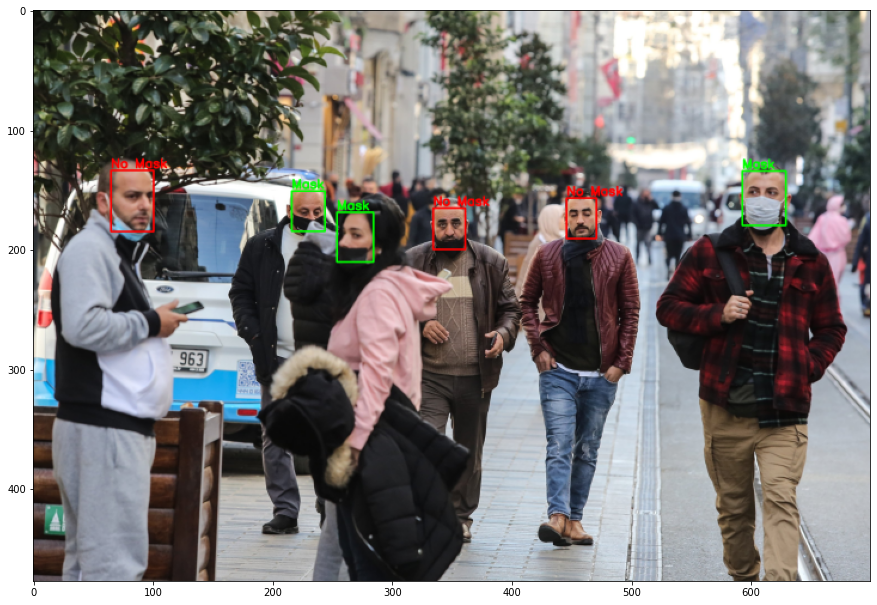

In [8]:
#IMAGE
img_path = '..\images/3.jpg' 
for_image(img_path, model)

In [10]:
#VIDEO
vid_path = '..\images/444.mp4'
vs2 = cv2.VideoCapture(vid_path)
for_video(vs2, model)